# Computer Vision

[1] P. Domingos, A Few Useful Things to Know About Machine Learning https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf

### 1. Learning = Representation + Evaluation + Optimization

All machine learning algorithms consider three components:

> **Representation** for a learner represents the set if classifiers/functions that can be possibly model. This set is called *hypothesis space*.

> **Evaluation** function tells how good the machine learning model is.

> **Optimisation** represent the method to search for the most optimal learning model.

![](https://miro.medium.com/max/1600/1*AsfkdCyNlXqdp4gHiqxkCQ.png)

### Question

***What Representations, Evaluations and Optimisations have we covered so far?***

### 7. Feature Engineering Is The Key

Machine Learning represents an iterative process where we train the learner, analyze the results, modify the learner/data and repeat. Feature engineering comprises a crucial step in this pipeline. Possessing independent features that correlate positively with the class makes learning easier. Feature engineering is equally as difficult as the other components as it requires domain-specific knowledge beyond just the data.

## Limitations of the previous Classifiers

In the theory section, you saw its possible to train an image classifier for digits using the MNIST dataset. This produced a somewhat accurate classifier, but there were a few obvious constraints.

For example over here represent a couple of the images in MNIST
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

The Classifiers that we created merely learned from the raw pixels what makes up a nine or a zero. However, consider these digits:

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/05/Example-MNIST-images.png)

At this stage, we see that the digit $1$ is not always exactly uncentred, or the same width or we might have slightly rotated versions of it. It is inefficient to have to learn every possible rotation, scale and translation of $1$. 

That's where Convolutions are extremely powerful. A convolution is a filter that passes over an image, processing it, and extracting features. In this lab, we'll observe how they work, by processing an image to examine if you can extract features from it!

## What are Convolutions?

What represents a convolution? In this lab, we'll explore what they are and how they work, and then later we'll see how to utilize them in a classifier.

As follows, when $g$ has finite support in the set $ \{-M,-M+1,\dots ,M-1,M\}$ (representing, for instance, a finite impulse response) , a finite summation may be used:

$$
(f*g)[n]=\sum _{m=-M}^{M}f[n-m]g[m].
$$

![](https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif)

Generating convolutions is incredibly simple - you simply scan every pixel in the image and then look at its neighbouring pixels. You multiply out the values of these pixels by the equivalent weights in a filter. 

Accordingly, for example, consider this:

![Convolution on image](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig1.png)

In this case, a $3 \times 3$ Convolution is specified.

The current pixel value is 192, but you can calculate the new one by looking at the neighbour values, and multiplying them out by the values specified in the filter, and making the new pixel value the final amount.

Let's start by importing some python libraries.

In [1]:
import numpy as np
import pandas as pd
from scipy import misc
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore how convolutions work by producing a basic convolution on a 2D Grey Scale image. Initially, we can load an image by taking the ```ascent``` image from scipy. It's an attractive example as it has lots of angles and lines. 

In [2]:
ascent = misc.ascent()

Next, we can use the pyplot library to draw the image so we know what it looks like.

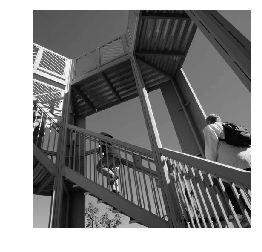

In [3]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent)
plt.show()

We can see that this is an image of a stairwell. There are lots of features in here that we can play with seeing if we can isolate them **for example there are strong vertical lines.**

The image is stored as a numpy array, let's get the dimensions of the image so we can loop over it later. 

In [4]:
size_x = ascent.shape[0]
size_y = ascent.shape[1]

We can start by using a 2D convolution with a complex Scharr operator as a 3x3 array to give us a gradient. 

In [5]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) 

In [6]:
pd.DataFrame(np.real(scharr)).style.background_gradient(cmap='Blues', axis=None)

,0,1,2
0,-3,0,3
1,-10,0,10
2,-3,0,3


In [7]:
pd.DataFrame(np.imag(scharr)).style.background_gradient(cmap='Blues', axis=None)

,0,1,2
0,-3,-10,-3
1,0,0,0
2,3,10,3


We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

1. Horizontal operator is real, vertical is imaginary.
2. Use symmetric boundary condition to avoid creating edges at the image boundaries.

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

In [8]:
transformed = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

Finally we'll load the new value into the transformed image. Now we can plot the image to see the effect of the convolution!

/home/tvzyl/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


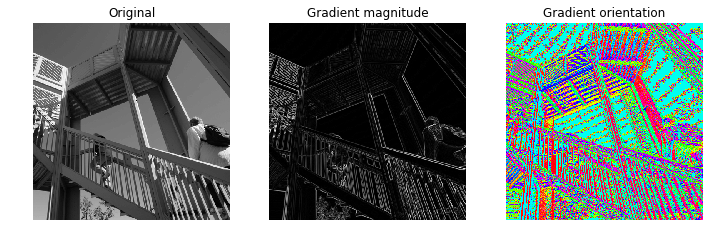

In [9]:
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(1, 3, figsize=(12,6))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(transformed), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(transformed), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()

So, consider the following filter values, and their impact on the image.

Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:

In [10]:
vertic = np.array([[ -1-0j, -2-0j, -1+0j],
                   [ -0+0j, +0+0j, +0+0j],
                   [ +1+0j, +2+0j, +1+0j]])

In [11]:
pd.DataFrame(np.real(vertic)).style.background_gradient(cmap='Blues', axis=None)

,0,1,2
0,-1,-2,-1
1,0,0,0
2,1,2,1


In [12]:
grad = signal.convolve2d(ascent, vertic, boundary='symm', mode='same')

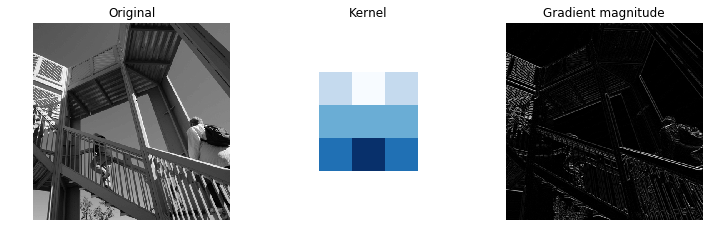

In [13]:
fig, (ax_orig, ax_kern, ax_mag) = plt.subplots(1, 3, figsize=(12,6))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kern.imshow(np.real(vertic), cmap='Blues') 
ax_kern.set_xlim(-2, 4); ax_kern.set_ylim(4, -2)
ax_kern.set_title('Kernel')
ax_kern.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
fig.show()

<!--
[Detecting vertical lines filter](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig2.png)
-->

Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

In [14]:
horizn = vertic.T

In [15]:
pd.DataFrame(np.real(horizn)).style.background_gradient(cmap='Blues', axis=None)

,0,1,2
0,-1,0,1
1,-2,0,2
2,-1,0,1


In [16]:
grad = signal.convolve2d(ascent, horizn, boundary='symm', mode='same')

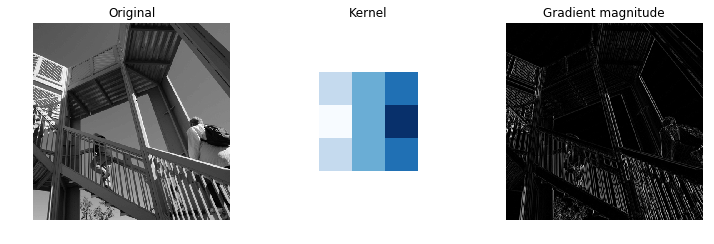

In [17]:
fig, (ax_orig, ax_kern, ax_mag) = plt.subplots(1, 3, figsize=(12,6))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kern.imshow(np.real(horizn), cmap='Blues') 
ax_kern.set_xlim(-2, 4); ax_kern.set_ylim(4, -2)
ax_kern.set_title('Kernel')
ax_kern.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
fig.show()

<!--
![Detecting horizontal lines](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig3.png)
-->

Explore different values for yourself! 

In [18]:
# vertic = np.array([[ -1-0j, -2-0j, -1+0j],
#                    [ -0+0j, +0+0j, +0+0j],
#                    [ +1+0j, +2+0j, +1+0j]])
# grad = signal.convolve2d(ascent, vertic, boundary='symm', mode='same')

In [19]:
# fig, (ax_orig, ax_mag) = plt.subplots(1, 2, figsize=(12,6))
# ax_orig.imshow(ascent, cmap='gray')
# ax_orig.set_title('Original')
# ax_orig.set_axis_off()
# ax_mag.imshow(np.absolute(grad), cmap='gray')
# ax_mag.set_title('Gradient magnitude')
# ax_mag.set_axis_off()
# fig.show()

## Pooling

As well as using convolutions, pooling aids us hugely in detecting features. The goal is to discover the extent to which a signal exists in a region of an image while maintaining translational invariance.

There are a number of types of pooling, but for this lab, we'll use one called MAX pooling. 

The idea is to iterate over the image and look at the pixel and it's immediate neighbours to the right, underneath, and right-beneath. Take the largest (consequently the name MAX pooling) of them and place it into the new image. As a result, the new image will be 1/4 the size of the old - with the dimensions on X and Y being halved by this process. You'll see the features get maintained despite this compression!

![Max Pooling](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig4.png)

This code will show a (2, 2) pooling. Run it to examine the output, and you'll see that while the image is 1/4 the size of the original, the extracted features are maintained!

/home/tvzyl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


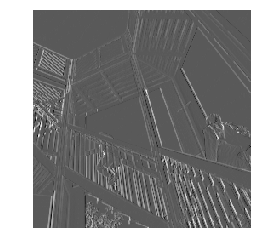

In [20]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(transformed[x, y])
        pixels.append(transformed[x+1, y])
        pixels.append(transformed[x, y+1])
        pixels.append(transformed[x+1, y+1])
        pixels.sort(reverse=True)
        newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.axis('off')
plt.show()      

### Exercise

1. Start by transforming the MNIST **training** dataset using a convolution and MAX pooling.
2. Train a classifier on your transformed data.
3. Compare your training loss to the training loss of the untransformed data using the same classfier

**Hint: In the morning we used various classfiers on MNIST**

In [21]:
import time

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 36.954 s
Sparsity with L2 penalty: 8.93%
Test score with L2 penalty: 0.8959


In [22]:
### Your Solution Starts Here

### 2. Its Generalization That Counts

The fundamental goal of machine learning is to generalise beyond the training set. The data used to evaluate must be kept separate from the data employed to train the model. When we use generalisation as a goal, we do not have access to a function that we can optimise. Consequently, we are forced to implement a training loss as a proxy for test error.

### Exercise

1. Compare your testing loss to the testing loss of the untransformed data using the same classfier.

In [23]:
### Your Solution Start Here

### 4. Overfitting Has Many Faces

One way to interpret overfitting is to break down generalisation error into two components: bias and variance. **Bias** represents the tendency of the learner to constantly model the same wrong examples (In the image, a high bias would suggest more distance from the centre.). **Variance** represents the tendency to model arbitrary things irrespective of the signal (In the image, a significant variance would mean more scattered points.). 

![Bias Variance Diagram](https://raw.githubusercontent.com/shagunsodhani/papers-I-read/master/assets/FewThingsAboutML/BiasVarianceDiagram.png)

A more impressive learner, one that learns many models, need not be better than a less powerful one as they both may have significant variance. While noise does not constitute the reason for overfitting, it can indeed aggravate the problem. Some tools against overfitting are - **cross-validation**, **regularization**, **statistical significance testing**, etc. 

### Exercise

1. If your classfier has any hyper-parameters tune these using cross-validation.

In [24]:
### Your Solution Start Here